<a href="https://colab.research.google.com/github/Mayank030/Big-Mart-Sales-Prediction/blob/main/Bigmart_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Big Mart Sales Prediction using Machine Learning**

## Dataset :

https://www.kaggle.com/datasets/akashdeepkuila/big-mart-sales

## Work Flow :

Data Collection

Data Processing

Data Analysis (EDA)

Splitting the Dataset

XGBoost Regressor

Evalute


### Variable Description

ProductID : unique product ID

Weight : weight of products

FatContent : specifies whether the product is low on fat or not

Visibility : percentage of total display area of all products in a store
allocated to the particular product

ProductType : the category to which the product belongs

MRP : Maximum Retail Price (listed price) of the products

OutletID : unique store ID

EstablishmentYear : year of establishment of the outlets

OutletSize : the size of the store in terms of ground area covered

LocationType : the type of city in which the store is located

OutletType : specifies whether the outlet is just a grocery store or some sort of supermarket

OutletSales : (Target variable) sales of the product in the particular store

### Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

### Data Collection and Analysis

In [ ]:
# Loading the Dataset

big_mart_data = pd.read_csv('/content/Train-Set.csv')

big_mart_data.info()

print("\n Rows : ", big_mart_data.shape[0])
print("\n Columns : ", big_mart_data.shape[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ProductID          8523 non-null   object 
 1   Weight             7060 non-null   float64
 2   FatContent         8523 non-null   object 
 3   ProductVisibility  8523 non-null   float64
 4   ProductType        8523 non-null   object 
 5   MRP                8523 non-null   float64
 6   OutletID           8523 non-null   object 
 7   EstablishmentYear  8523 non-null   int64  
 8   OutletSize         6113 non-null   object 
 9   LocationType       8523 non-null   object 
 10  OutletType         8523 non-null   object 
 11  OutletSales        8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB

 Rows :  8523

 Columns :  12


In [ ]:
big_mart_data.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Categorical Features

* Product ID

* FatContent -- Low Fat, Regular

* Item Type -- Dairy, Softdrink, Meat, Fruits and vegetables, Household, Baking Goods, Snack Foods, Frozen Foods, Health and Hygiene, Breakfast, Hard Drinks, Canned, Breads.

* OutletID

* OutletSize -- Small, Medium, High

* LocationType -- Tier1, Tier2, Tier3

* OutletType -- Supermarket Type1, Supermarket Type2, Supermarket Type3, Grocery Store.





### Handling Missing Values

Mean --> Average Value

Mode --> Most Repeated Value

In [ ]:
big_mart_data.isnull().sum()

ProductID               0
Weight               1463
FatContent              0
ProductVisibility       0
ProductType             0
MRP                     0
OutletID                0
EstablishmentYear       0
OutletSize           2410
LocationType            0
OutletType              0
OutletSales             0
dtype: int64

In [ ]:
# Filling the missing values of "Weight" with "Mean" of the Col

mean_of_weight = big_mart_data['Weight'].mean()

big_mart_data['Weight'].fillna(mean_of_weight, inplace=True)

In [ ]:
# Filling the missing values of "OutletSize" with "Mode"

# The OutletSize depends on OutletType and based on that Size would be allocated.
# For e.g. If Outlet Type is Grocery, Mode of OutletSize is Small.
# i.e Mode for Grocery Store is Small

mode_of_outletsize = big_mart_data.pivot_table(values='OutletSize', columns='OutletType', aggfunc=(lambda x : x.mode()[0]))

In [ ]:
print(mode_of_outletsize)

OutletType Grocery Store Supermarket Type1 Supermarket Type2 Supermarket Type3
OutletSize         Small             Small            Medium            Medium


In [ ]:
missing_values = big_mart_data['OutletSize'].isnull()   # Array of T\F values (T is null)
#print(missing_values)
# Convert the T's into its respective OuletType

big_mart_data.loc[missing_values, 'OutletSize'] = big_mart_data.loc[missing_values,'OutletType'].apply(lambda x: mode_of_outletsize[x])

In [ ]:
big_mart_data.isnull().sum()

ProductID            0
Weight               0
FatContent           0
ProductVisibility    0
ProductType          0
MRP                  0
OutletID             0
EstablishmentYear    0
OutletSize           0
LocationType         0
OutletType           0
OutletSales          0
dtype: int64

### Data Analysis/Visualization


In [ ]:
# Statistical measures about the Data (only for numerical features)

big_mart_data.describe()

,Weight,ProductVisibility,MRP,EstablishmentYear,OutletSales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [ ]:
# Visualizing Numerical Features

sns.set()

<ipython-input-214-e341c121e762>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['Weight'])  # Distribution Plot


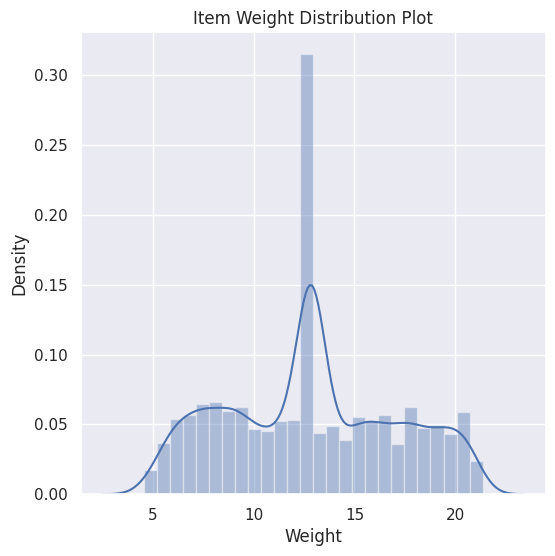

In [ ]:
# Item Weight Distribution Plot

plt.figure(figsize=(6,6))
plt.title('Item Weight Distribution Plot')
sns.distplot(big_mart_data['Weight'])  # Distribution Plot
plt.show()

<ipython-input-215-8b2b98379060>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['ProductVisibility'])  # Distribution Plot


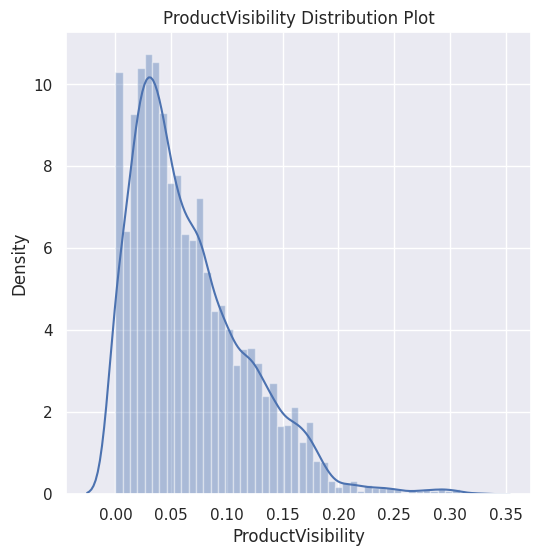

In [ ]:
# ProductVisibility	Distribution Plot

plt.figure(figsize=(6,6))
plt.title('ProductVisibility Distribution Plot')
sns.distplot(big_mart_data['ProductVisibility'])  # Distribution Plot
plt.show()

<ipython-input-216-d94e2e0888d7>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['MRP'])  # Distribution Plot


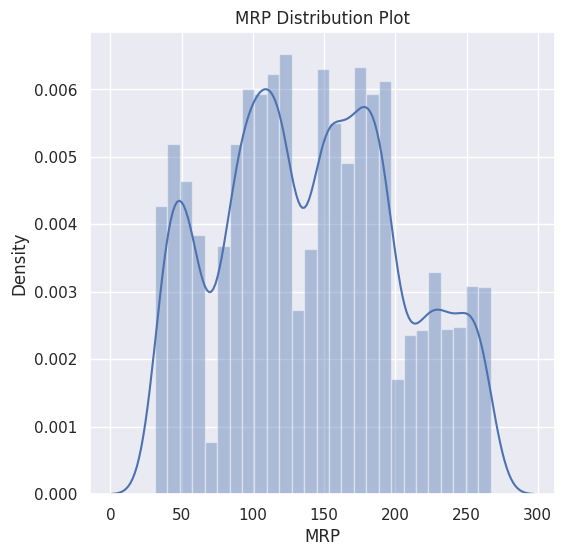

In [ ]:
# MRP	Distribution Plot

plt.figure(figsize=(6,6))
plt.title('MRP Distribution Plot')
sns.distplot(big_mart_data['MRP'])  # Distribution Plot
plt.show()

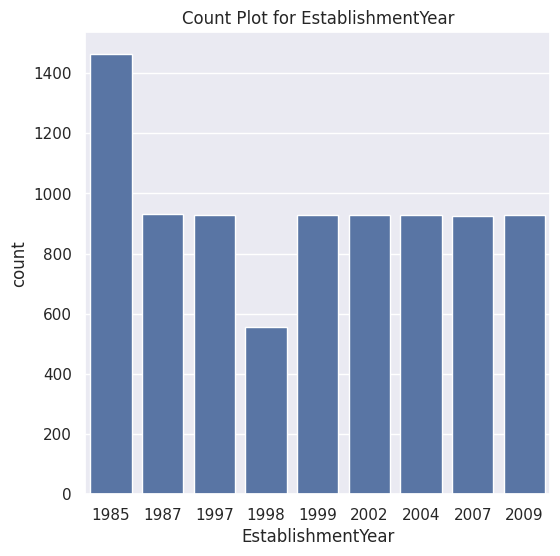

In [ ]:
# Count Plot for EstablishmentYear

plt.figure(figsize=(6,6))
plt.title('Count Plot for EstablishmentYear')
sns.countplot(x='EstablishmentYear', data=big_mart_data)
plt.show()

<ipython-input-218-0d7f2ab63558>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(big_mart_data['OutletSales'])  # Distribution Plot


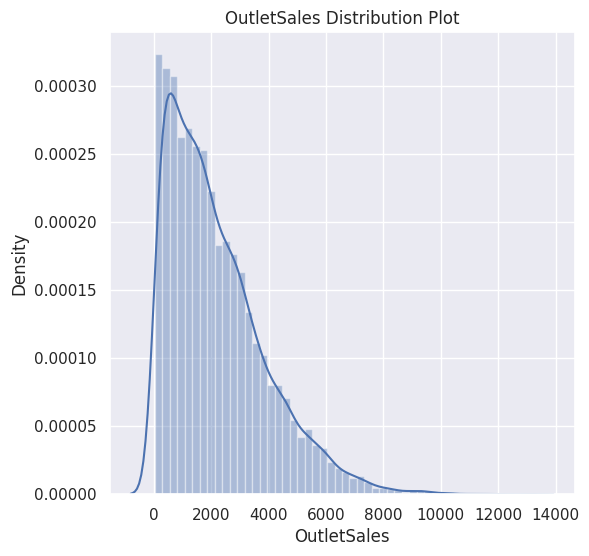

In [ ]:
# OutletSales	Distribution Plot

plt.figure(figsize=(6,6))
plt.title('OutletSales Distribution Plot')
sns.distplot(big_mart_data['OutletSales'])  # Distribution Plot
plt.show()

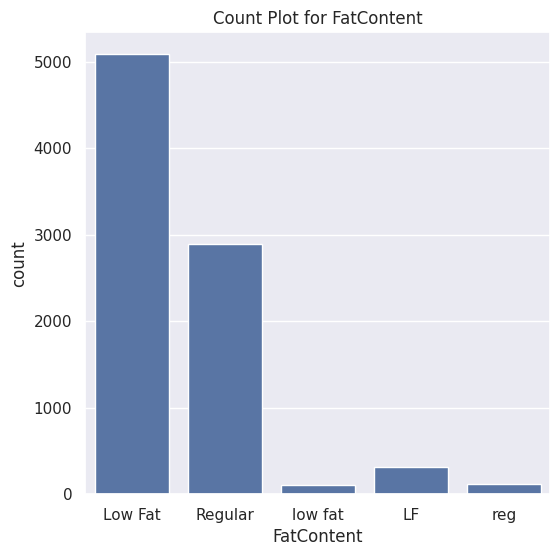

In [ ]:
# Visualizing Categorical Features

# Count Plot for EstablishmentYear

plt.figure(figsize=(6,6))
plt.title('Count Plot for FatContent')
sns.countplot(x='FatContent', data=big_mart_data)
plt.show()

# Data Cleaning is required as Low Fat, low fat and LF represent same

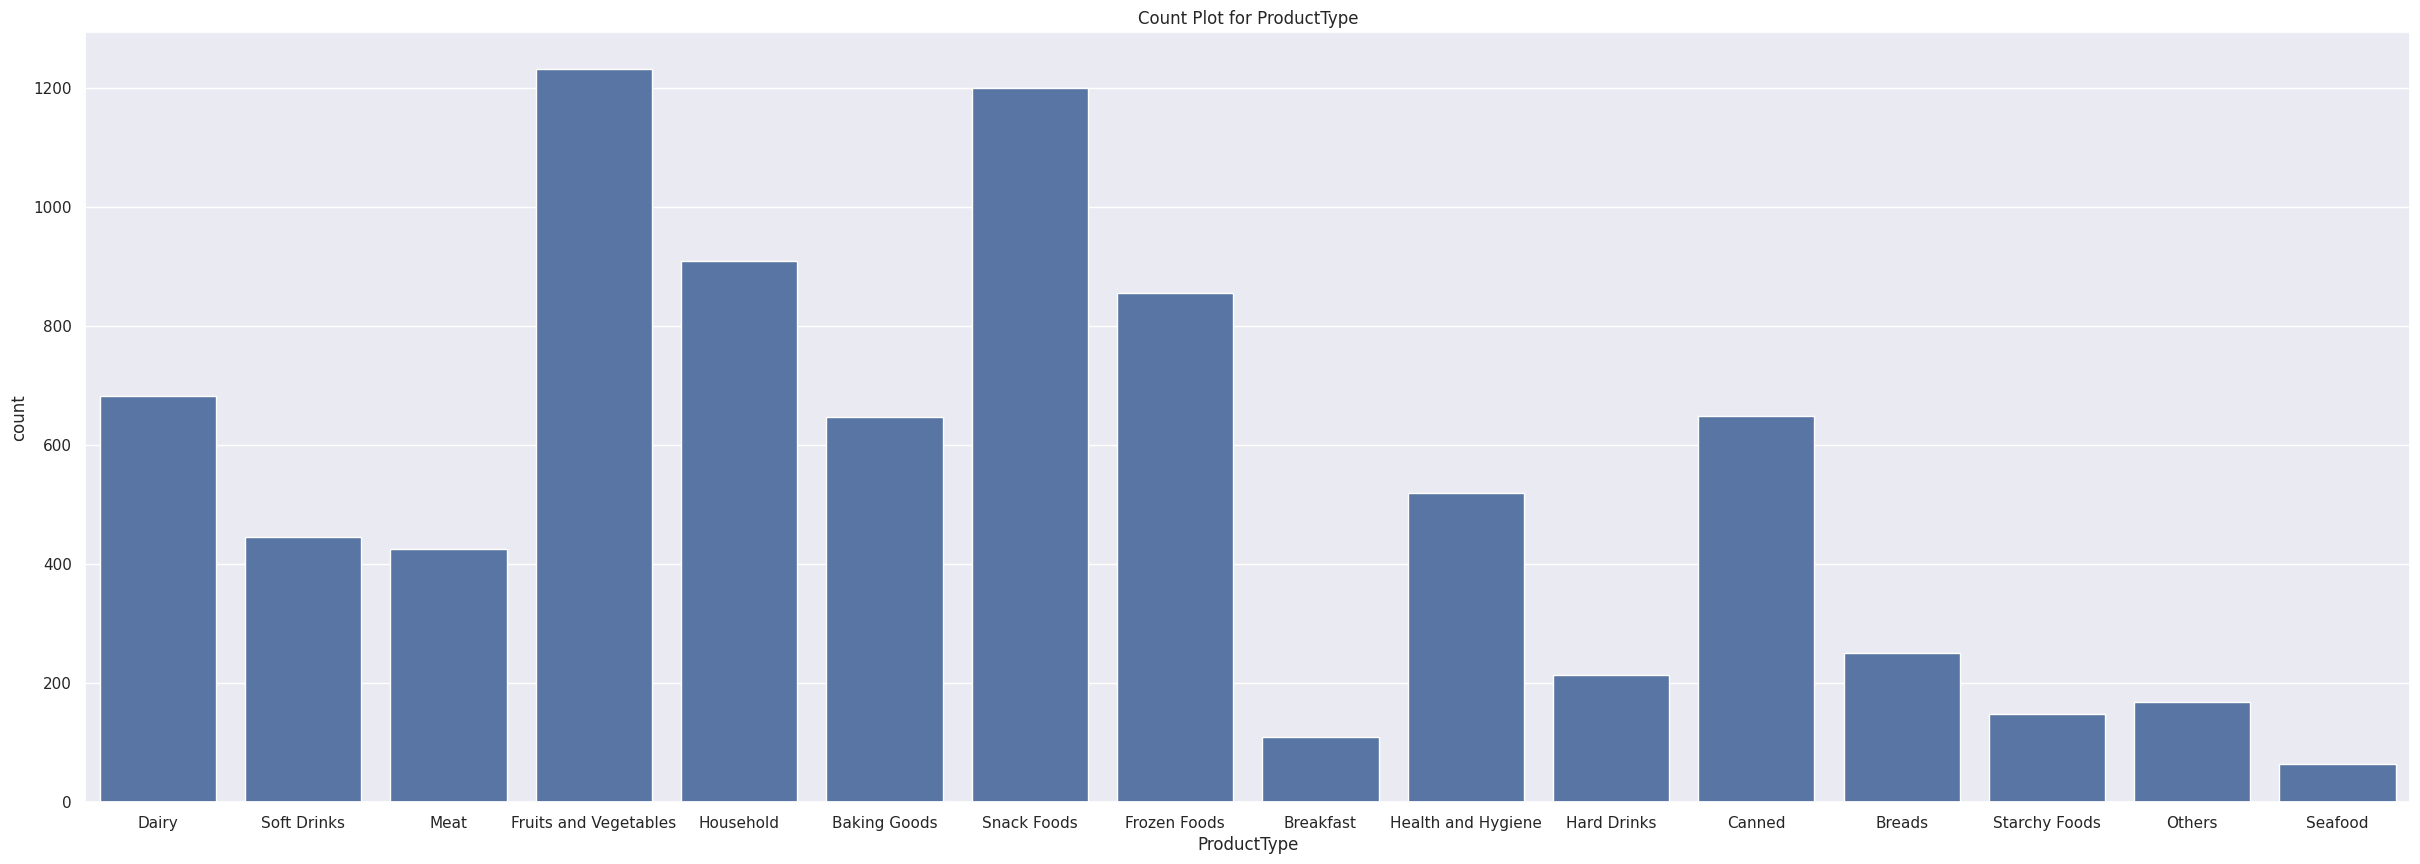

In [ ]:
# Count Plot for ProductType

plt.figure(figsize=(30,10))
plt.title('Count Plot for ProductType')
sns.countplot(x='ProductType', data=big_mart_data)
plt.show()

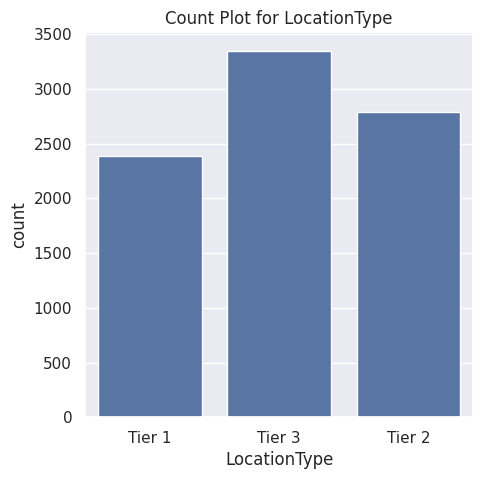

In [ ]:
# Count Plot for LocationType

plt.figure(figsize=(5,5))
plt.title('Count Plot for LocationType')
sns.countplot(x='LocationType', data=big_mart_data)
plt.show()

### Data Preprocessing

In [ ]:
# big_mart_data.head()

In [ ]:
big_mart_data['FatContent'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: FatContent, dtype: int64

In [ ]:
big_mart_data.replace({'FatContent' : {'low fat' : 'Low Fat', 'LF' : 'Low Fat' , 'reg': 'Regular'}} , inplace=True)

big_mart_data['FatContent'].value_counts()

Low Fat    5517
Regular    3006
Name: FatContent, dtype: int64

Label Encoding : Now we have to convert Categorical Featues into Numeric Value

In [ ]:
encoder = LabelEncoder()

big_mart_data['ProductID'] = encoder.fit_transform(big_mart_data['ProductID'])

big_mart_data['FatContent'] = encoder.fit_transform(big_mart_data['FatContent'])

big_mart_data['ProductType'] = encoder.fit_transform(big_mart_data['ProductType'])

big_mart_data['OutletID'] = encoder.fit_transform(big_mart_data['OutletID'])

big_mart_data['OutletSize'] = encoder.fit_transform(big_mart_data['OutletSize'])

big_mart_data['LocationType'] = encoder.fit_transform(big_mart_data['LocationType'])

big_mart_data['OutletType'] = encoder.fit_transform(big_mart_data['OutletType'])

In [ ]:
big_mart_data.head()

,ProductID,Weight,FatContent,ProductVisibility,ProductType,MRP,OutletID,EstablishmentYear,OutletSize,LocationType,OutletType,OutletSales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


### Splitting Features (X) and Target (Y)

In [ ]:
X = big_mart_data.drop(columns='OutletSales', axis=1)
Y = big_mart_data['OutletSales']

### Splitting the Dataset (Training and Test)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [ ]:
print("Shape of X : ", X.shape)
print("Shape of X Train : ", X_train.shape)
print("Shape of X Test: ", X_test.shape)

Shape of X :  (8523, 11)
Shape of X Train :  (6818, 11)
Shape of X Test:  (1705, 11)


### Training ML Model Regressor

In [ ]:
regressor = XGBRegressor()

regressor.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

### Evaluating the Model

In [ ]:
# Prediction on Training Data

training_data_predcition = regressor.predict(X_train)

In [ ]:
# R Squared Value

r2_train = metrics.r2_score(Y_train,training_data_predcition)

print("R Squared Value : ", r2_train)

R Squared Value :  0.8762174618111388


In [ ]:
# Prediction on Test Data

test_data_predcition = regressor.predict(X_test)

In [ ]:
# R Squared Value

r2_test = metrics.r2_score(Y_test,test_data_predcition)

print("R Squared Value : ", r2_test)

R Squared Value :  0.5017253991620692
